In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.constraints import MaxNorm
import keras
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from keras.layers import Dense, Dropout, Input
from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('./Datasets//Credit_card.csv')
labels = pd.read_csv('./Datasets/Credit_card_label.csv')

In [3]:
df.drop(columns=["Ind_ID"], inplace=True)
df.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [4]:
cats = [
    'GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income',
    'EDUCATION', 'Marital_status', 'Housing_type', 'Mobile_phone',
    'Work_Phone', 'Phone', 'Type_Occupation', 'EMAIL_ID'
]

conts = [
    'CHILDREN', 'Family_Members', 'Annual_income',
    'Age', 'EmployedDaysOnly', 'UnemployedDaysOnly'
]
def proc_data():
    df['Age'] = -df.Birthday_count // 365
    df['EmployedDaysOnly'] = df.Employed_days.apply(lambda x: x if x > 0 else 0)
    df['UnemployedDaysOnly'] = df.Employed_days.apply(lambda x: abs(x) if x < 0 else 0)

    for cat in cats:
        df[cat] = pd.Categorical(df[cat])

    modes = df.mode().iloc[0]
    df.fillna(modes, inplace=True)

proc_data()

C:\Users\saura\AppData\Local\Temp\ipykernel_10112\3288129252.py:20: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.fillna(modes, inplace=True)


In [5]:
dep = 'Approved'

df[dep] = labels.label.astype(int)

# df.loc[df[dep] == 1, 'Status'] = 'Approved'
# df.loc[df[dep] == 0, 'Status'] = 'Declined'

In [6]:
df.head(2)

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,...,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Age,EmployedDaysOnly,UnemployedDaysOnly,Approved
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,...,1,0,0,0,Laborers,2,51.0,365243,0,1
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,...,1,1,1,0,Laborers,2,37.0,0,586,1


In [7]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [8]:
X_over, y_over = RandomOverSampler().fit_resample(X, y)
X_train, X_val, y_train, y_val = train_test_split(X_over, y_over, test_size=0.25)

In [9]:
X_train[cats] = X_train[cats].apply(lambda x: x.cat.codes)
X_val[cats] = X_val[cats].apply(lambda x: x.cat.codes)

In [10]:
X_train

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Age,EmployedDaysOnly,UnemployedDaysOnly
2702,0,0,1,4,180000.0,0,4,1,1,-17468.0,-7413,0,0,0,0,3,6,47.0,0,7413
1039,0,0,1,0,135000.0,1,4,4,1,-22017.0,365243,0,0,1,0,8,1,60.0,365243,0
793,1,1,1,0,126000.0,1,4,2,1,-20309.0,365243,0,0,1,0,8,1,55.0,365243,0
73,0,0,1,0,225000.0,1,4,1,2,-21664.0,365243,0,0,1,0,8,2,59.0,365243,0
1131,1,1,1,1,315000.0,3,1,1,1,-17318.0,-552,0,0,1,0,8,3,47.0,0,552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,0,0,1,0,202500.0,3,4,0,1,-11107.0,-1953,0,0,0,0,3,2,30.0,0,1953
1341,0,0,1,0,99000.0,3,4,1,1,-15590.0,-890,0,0,0,0,14,2,42.0,0,890
307,0,0,0,0,54000.0,1,4,3,1,-20132.0,365243,0,0,0,0,8,1,55.0,365243,0
762,1,1,1,1,225000.0,2,4,1,1,-11695.0,-3929,0,1,0,0,8,3,32.0,0,3929


## Vanishing Problem

In [16]:
model = Sequential()

In [17]:
model.add(Input(shape=(20,)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [51]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,101 (4.30 KB)

 Trainable params: 1,101 (4.30 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [54]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5016 - loss: 0.6932 - val_accuracy: 0.4854 - val_loss: 0.6935
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4907 - loss: 0.6936 - val_accuracy: 0.4854 - val_loss: 0.6934
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4925 - loss: 0.6934 - val_accuracy: 0.4854 - val_loss: 0.6936
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4869 - loss: 0.6936 - val_accuracy: 0.4854 - val_loss: 0.6932
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5138 - loss: 0.6932 - val_accuracy: 0.4854 - val_loss: 0.6934
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4983 - loss: 0.6932 - val_accuracy: 0.4854 - val_loss: 0.6932
Epoch 7/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5105 - loss: 0.6932 - val_accuracy: 0.4854 - val_loss: 0.6933
Epoch 8/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5063 - loss: 0.6932 - val_accuracy: 0.4854 - v

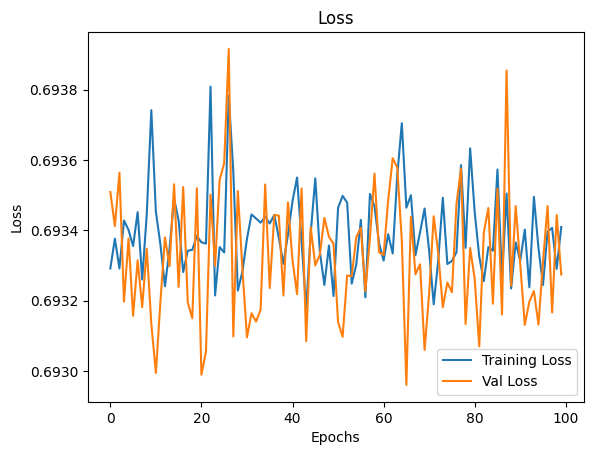

In [58]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Solution for Vanishing Gradient Problem

- Deeper Architecture: Augment model with more layers with increased numbers of neurons in each layer. Deeper architectures can capture more complex relationships in the data.
- Early Stopping: Early stopping is implemented to monitor the validation loss. Training will stop if the validation loss does not improve for a certain number of epochs (defined by patience).
- Increased Dropout: Dropout layers are added after each dense layer to help prevent overfitting.
- Adjusting Learning Rate: The learning rate is set to 0.001. You can experiment with different learning rates.

In [59]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [61]:
model2 = Sequential()

model2.add(Input(shape=(20,)))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))


In [62]:
model2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_35 (Dense)                │ (None, 128)            │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 76,929 (300.50 KB)

 Trainable params: 76,929 (300.50 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [67]:
model2.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [68]:
history2 = model2.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_val_scaled, y_val), 
                      batch_size=32, callbacks=[early_stopping])

Epoch 1/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5008 - loss: 0.7429 - val_accuracy: 0.5881 - val_loss: 0.6866
Epoch 2/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5481 - loss: 0.6947 - val_accuracy: 0.6143 - val_loss: 0.6777
Epoch 3/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5231 - loss: 0.7028 - val_accuracy: 0.6317 - val_loss: 0.6721
Epoch 4/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5509 - loss: 0.6809 - val_accuracy: 0.5910 - val_loss: 0.6641
Epoch 5/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6179 - loss: 0.6603 - val_accuracy: 0.6201 - val_loss: 0.6466
Epoch 6/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6311 - loss: 0.6626 - val_accuracy: 0.6536 - val_loss: 0.6382
Epoch 7/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6598 - loss: 0.6316 - val_accuracy: 0.6623 - val_loss: 0.6153
Epoch 8/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6650 - loss: 0.6221 - val_accuracy: 0.6769 - v

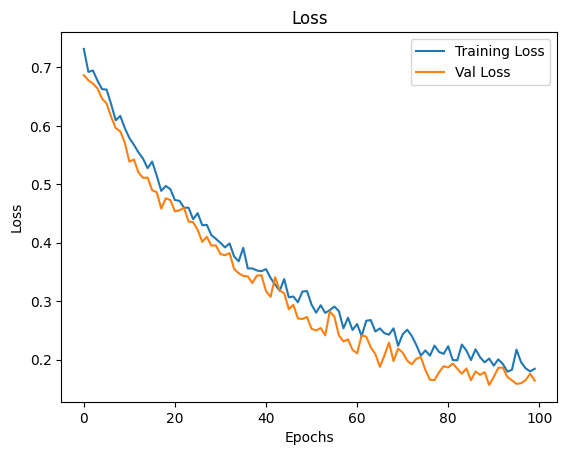

In [70]:
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [71]:
predictions = model2.predict(X_val_scaled)
rounded_predictions = np.round(predictions)
report = classification_report(y_val, rounded_predictions)
print(f'Classification Report:\n{report}')

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94       345
           1       0.91      0.99      0.95       342

    accuracy                           0.94       687
   macro avg       0.95      0.94      0.94       687
weighted avg       0.95      0.94      0.94       687



## Exploding Problem

In [11]:
model3 = Sequential()


model3.add(Input(shape=(20,)))
model3.add(Dense(10, activation='tanh', kernel_initializer=RandomNormal(mean=0.0, stddev=1.0)))
model3.add(Dense(10, activation='tanh', kernel_initializer=RandomNormal(mean=0.0, stddev=1.0)))
model3.add(Dense(10, activation='tanh', kernel_initializer=RandomNormal(mean=0.0, stddev=1.0)))
model3.add(Dense(10, activation='tanh', kernel_initializer=RandomNormal(mean=0.0, stddev=1.0)))
model3.add(Dense(10, activation='tanh', kernel_initializer=RandomNormal(mean=0.0, stddev=1.0)))
model3.add(Dense(10, activation='tanh', kernel_initializer=RandomNormal(mean=0.0, stddev=1.0)))
model3.add(Dense(10, activation='tanh', kernel_initializer=RandomNormal(mean=0.0, stddev=1.0)))
model3.add(Dense(10, activation='tanh', kernel_initializer=RandomNormal(mean=0.0, stddev=1.0)))
model3.add(Dense(1, activation='sigmoid'))
# Using a poor weight initialization (random_normal with a large std deviation)

In [17]:
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 993 (3.88 KB)

 Trainable params: 991 (3.87 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [12]:
optimizer = SGD(learning_rate=1.0)  
model3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [13]:
history3 = model3.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5165 - loss: 0.8289 - val_accuracy: 0.5121 - val_loss: 0.6930
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5153 - loss: 0.7250 - val_accuracy: 0.4879 - val_loss: 0.6973
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4815 - loss: 0.7142 - val_accuracy: 0.5121 - val_loss: 0.7063
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5060 - loss: 0.6990 - val_accuracy: 0.4879 - val_loss: 0.7125
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4976 - loss: 0.7131 - val_accuracy: 0.5121 - val_loss: 0.7194
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5036 - loss: 0.6969 - val_accuracy: 0.5121 - val_loss: 0.6929
Epoch 7/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4902 - loss: 0.7019 - val_accuracy: 0.4879 - val_loss: 0.6954
Epoch 8/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5007 - loss: 0.7042 - val_accuracy: 0.5121 - v

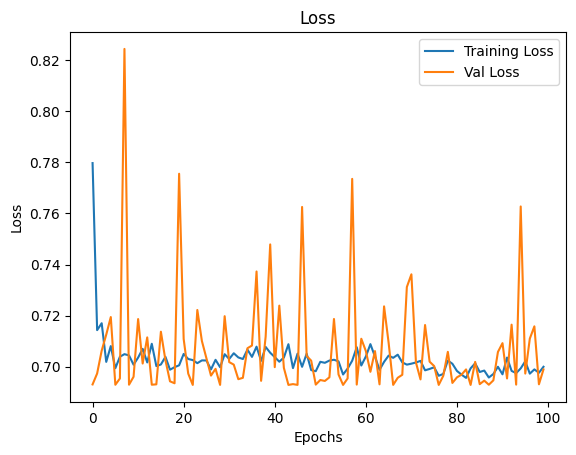

In [14]:
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Solution for Exploding Gradient Problem

- Weight Initialization: The weight initialization is changed to 'glorot_uniform,' which is a commonly used initialization for neural networks.
- Gradient Clipping: The clipnorm parameter in the Adam optimizer is set to 1.0, which performs gradient clipping. This helps prevent exploding gradients.
- Kernel Constraint: The max_norm constraint is applied to the kernel weights of each layer with a maximum norm of 2.0. This further helps in preventing exploding gradients.

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [25]:
model4 = Sequential()

model4.add(Input(shape=(20,)))
model4.add(Dense(10, activation='tanh', kernel_initializer='glorot_uniform', kernel_constraint=MaxNorm(2.0)))
model4.add(Dense(10, activation='tanh', kernel_initializer='glorot_uniform', kernel_constraint=MaxNorm(2.0)))
model4.add(Dense(10, activation='tanh', kernel_initializer='glorot_uniform', kernel_constraint=MaxNorm(2.0)))
model4.add(Dense(10, activation='tanh', kernel_initializer='glorot_uniform', kernel_constraint=MaxNorm(2.0)))
model4.add(Dense(10, activation='tanh', kernel_initializer='glorot_uniform', kernel_constraint=MaxNorm(2.0)))
model4.add(Dense(10, activation='tanh', kernel_initializer='glorot_uniform', kernel_constraint=MaxNorm(2.0)))
model4.add(Dense(10, activation='tanh', kernel_initializer='glorot_uniform', kernel_constraint=MaxNorm(2.0)))
model4.add(Dense(10, activation='tanh', kernel_initializer='glorot_uniform', kernel_constraint=MaxNorm(2.0)))
model4.add(Dense(1, activation='sigmoid'))


In [26]:
model4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991 (3.87 KB)

 Trainable params: 991 (3.87 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model4.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001, clipnorm=1.0), metrics=['accuracy'])

In [28]:
history4 = model4.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_val_scaled, y_val), batch_size=32, callbacks=[early_stopping])

Epoch 1/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5323 - loss: 0.7059 - val_accuracy: 0.5488 - val_loss: 0.6866
Epoch 2/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5635 - loss: 0.6818 - val_accuracy: 0.5619 - val_loss: 0.6810
Epoch 3/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6021 - loss: 0.6635 - val_accuracy: 0.5750 - val_loss: 0.6782
Epoch 4/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6125 - loss: 0.6587 - val_accuracy: 0.5939 - val_loss: 0.6682
Epoch 5/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5983 - loss: 0.6526 - val_accuracy: 0.6099 - val_loss: 0.6599
Epoch 6/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6511 - loss: 0.6254 - val_accuracy: 0.6172 - val_loss: 0.6418
Epoch 7/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6783 - loss: 0.6090 - val_accuracy: 0.6594 - val_loss: 0.6121
Epoch 8/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7225 - loss: 0.5653 - val_accuracy: 0.7322 - 

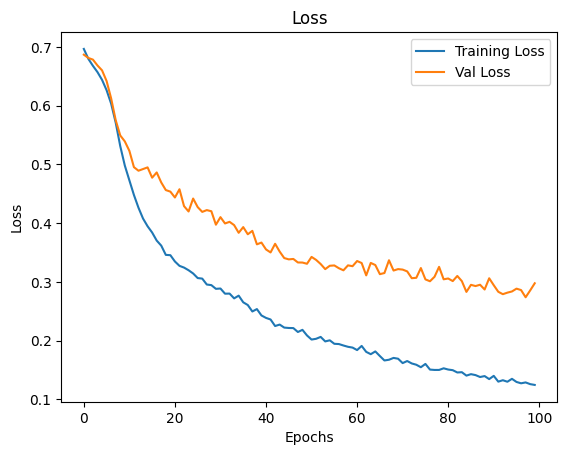

In [30]:
plt.plot(history4.history['loss'], label='Training Loss')
plt.plot(history4.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [31]:
predictions = model4.predict(X_val_scaled)
rounded_predictions = np.round(predictions)
report = classification_report(y_val, rounded_predictions)
print(f'Classification Report:\n{report}')

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.84      0.91       335
           1       0.87      0.98      0.92       352

    accuracy                           0.91       687
   macro avg       0.92      0.91      0.91       687
weighted avg       0.92      0.91      0.91       687

